In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline
sns.set(style="ticks", color_codes=True)

In [2]:
DATA_FOLDER = '../DATA/raw/sensors/'
files = os.listdir(DATA_FOLDER)
sds_files = [i for i in files if 'sds011' in i]
bme_files = [i for i in files if 'bme280' in i]
dht_files = [i for i in files if 'dht22' in i]

In [3]:
with open('../processing_lists/sensorID_list.txt', 'r') as sensors:
    sensor_list = sensors.read().splitlines()
    indoor_sensors = [i for i in sensor_list if 'indoor' in i]

In [4]:
sds_files = [i for i in sds_files if i.split('_')[0] not in indoor_sensors]
bme_files = [i for i in bme_files if i.split('_')[0] not in indoor_sensors]
dht_files = [i for i in dht_files if i.split('_')[0] not in indoor_sensors]

In [5]:
data = pd.read_csv(os.path.join(
    DATA_FOLDER, '26717_bme280_sensor_.csv'), delimiter=';', parse_dates=['timestamp'], index_col=5)
data.head()

,sensor_id,sensor_type,location,lat,lon,pressure,altitude,pressure_sealevel,temperature,humidity
timestamp,,,,,,,,,,
2019-05-27 18:12:41,26717,BME280,14325,55.684,37.584,99031.29,NaN,NaN,18.46,43.94
2019-05-27 18:15:22,26717,BME280,14325,55.684,37.584,99037.25,NaN,NaN,18.39,44.21
2019-05-27 18:17:56,26717,BME280,14325,55.684,37.584,99032.41,NaN,NaN,18.33,44.31
2019-05-27 18:20:30,26717,BME280,14325,55.684,37.584,99032.87,NaN,NaN,18.35,44.31
2019-05-27 18:23:03,26717,BME280,14325,55.684,37.584,99031.01,NaN,NaN,18.33,44.49


In [6]:
sensors_data =[]

In [7]:
idx = pd.date_range('2019-04-01', '2019-12-08', freq='5T')

In [8]:
sds_data = pd.DataFrame(idx, columns=['date'])
sds_data = sds_data.set_index('date')

In [9]:
bme_data = pd.DataFrame(idx, columns=['date'])
bme_data = bme_data.set_index('date')

In [10]:
from pandas.errors import EmptyDataError
for f in bme_files:
    try:
        data = pd.read_csv(os.path.join(
            DATA_FOLDER, f), delimiter=';', parse_dates=['timestamp'], index_col=5)
        s_id = data.iloc[0].sensor_id
        s_type = data.iloc[0].sensor_type
        lat = data.iloc[0].lat
        lon = data.iloc[0].lon
        sensors_data.append([s_id, s_type, lat, lon])
        data['pressure'] = data.pressure.replace('unavailable', None)
        data['temperature'] = data.temperature.replace('unavailable', None)
        data['humidity'] = data.humidity.replace('unavailable', None)
        data['pressure'] = data.pressure.astype(float)
        data['temperature'] = data.temperature.astype(float)
        data['humidity'] = data.humidity.astype(float)
        new_data = data['2019-04':].resample('5T').mean()
        new_data.reindex(idx, fill_value=None)
        bme_data['pressure_'+str(s_id)] = new_data.pressure
        bme_data['temperature_'+str(s_id)] = new_data.temperature
        bme_data['humidity_'+str(s_id)] = new_data.humidity
    except EmptyDataError:
        pass

In [11]:
from pandas.errors import EmptyDataError
for f in sds_files:
    try:
        data = pd.read_csv(os.path.join(
            DATA_FOLDER, f), delimiter=';', parse_dates=['timestamp'], index_col=5)
        s_id = data.iloc[0].sensor_id
        s_type = data.iloc[0].sensor_type
        lat = data.iloc[0].lat
        lon = data.iloc[0].lon
        sensors_data.append([s_id, s_type, lat, lon])
        data['P1'] = data.P1.replace('unavailable', None)
        data['P2'] = data.P2.replace('unavailable', None)
        data['P1'] = data.P1.astype(float)
        data['P2'] = data.P2.astype(float)
        new_data = data['2019-04':].resample('5T').mean()
        new_data.reindex(idx, fill_value=None)
        sds_data['P1_'+str(s_id)] = new_data.P1
        sds_data['P2_'+str(s_id)] = new_data.P2
    except EmptyDataError:
        pass

/home/anatoly/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (6,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
sensors = pd.DataFrame(sensors_data, columns=['sensor_id', 'sensor_type', 'lat', 'lon'])

In [13]:
bme_data.head()

,pressure_26717,temperature_26717,humidity_26717,pressure_32440,temperature_32440,humidity_32440,pressure_35435,temperature_35435,humidity_35435,pressure_32710,...,humidity_35443,pressure_32338,temperature_32338,humidity_32338,pressure_30732,temperature_30732,humidity_30732,pressure_34670,temperature_34670,humidity_34670
date,,,,,,,,,,,,,,,,,,,,,
2019-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-01 00:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-01 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-01 00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
p1_col = [i for i in sds_data.columns if 'P1_' in i]
p2_col = [i for i in sds_data.columns if 'P2_' in i]

In [15]:
temp_col = [i for i in bme_data.columns if 'temperature_' in i]
pres_col = [i for i in bme_data.columns if 'pressure_' in i]
hum_col = [i for i in bme_data.columns if 'humidity_' in i]

In [16]:
avg_data = pd.DataFrame(idx, columns=['date'])
avg_data = avg_data.set_index('date')

In [17]:
avg_data['P1'] = sds_data[p1_col].mean(axis = 1, skipna = True)
avg_data['P2'] = sds_data[p2_col].mean(axis = 1, skipna = True)
avg_data['pressure'] = bme_data[pres_col].mean(axis = 1, skipna = True)
avg_data['temperature'] = bme_data[temp_col].mean(axis = 1, skipna = True)
avg_data['humidity'] = bme_data[hum_col].mean(axis = 1, skipna = True)
avg_data['P1_std'] = sds_data[p1_col].std(axis = 1, skipna = True)
avg_data['P2_std'] = sds_data[p2_col].std(axis = 1, skipna = True)
avg_data['pressure_std'] = bme_data[pres_col].std(axis = 1, skipna = True)
avg_data['temperature_std'] = bme_data[temp_col].std(axis = 1, skipna = True)
avg_data['humidity_std'] = bme_data[hum_col].std(axis = 1, skipna = True)
avg_data.head()

,P1,P2,pressure,temperature,humidity,P1_std,P2_std,pressure_std,temperature_std,humidity_std
date,,,,,,,,,,
2019-04-01 00:00:00,5.645000,3.137143,98513.2400,7.09250,55.9125,1.008224,0.709371,612.681767,1.196735,2.919511
2019-04-01 00:05:00,5.513333,3.040595,98521.9400,7.02000,56.0350,1.359509,0.797857,614.509696,1.230007,3.065667
2019-04-01 00:10:00,5.504643,3.011786,98522.7600,7.04125,55.8850,1.512618,0.933899,613.946187,1.265414,3.335688
2019-04-01 00:15:00,6.790714,3.461071,98529.4850,6.98125,55.9075,3.209377,1.644803,609.764213,1.211214,3.232178
2019-04-01 00:20:00,7.344643,4.065357,98529.3075,6.97875,55.8550,7.148042,3.540958,615.146656,1.342723,3.579527


In [18]:
avg_data_nov = avg_data.loc['2019-11']
avg_data_nov.head()

,P1,P2,pressure,temperature,humidity,P1_std,P2_std,pressure_std,temperature_std,humidity_std
date,,,,,,,,,,
2019-11-01 00:00:00,5.447230,2.788738,99699.924009,-0.225120,62.040796,2.170635,1.039831,394.749433,1.942339,10.170450
2019-11-01 00:05:00,5.398659,2.720000,99705.831125,0.320530,61.221656,2.460794,1.025621,390.759629,4.116605,11.681109
2019-11-01 00:10:00,5.335707,2.675789,99688.755796,-0.209352,62.198671,2.345273,1.035334,396.706302,1.921725,10.247896
2019-11-01 00:15:00,5.212509,2.657473,99698.406947,0.364793,61.097459,2.193809,1.068861,401.605542,4.087831,11.512269
2019-11-01 00:20:00,4.775644,2.607932,99699.205450,-0.191926,62.078838,2.128603,1.052181,411.762909,1.981611,10.072612


Text(0.5, 1.0, 'humidity std')

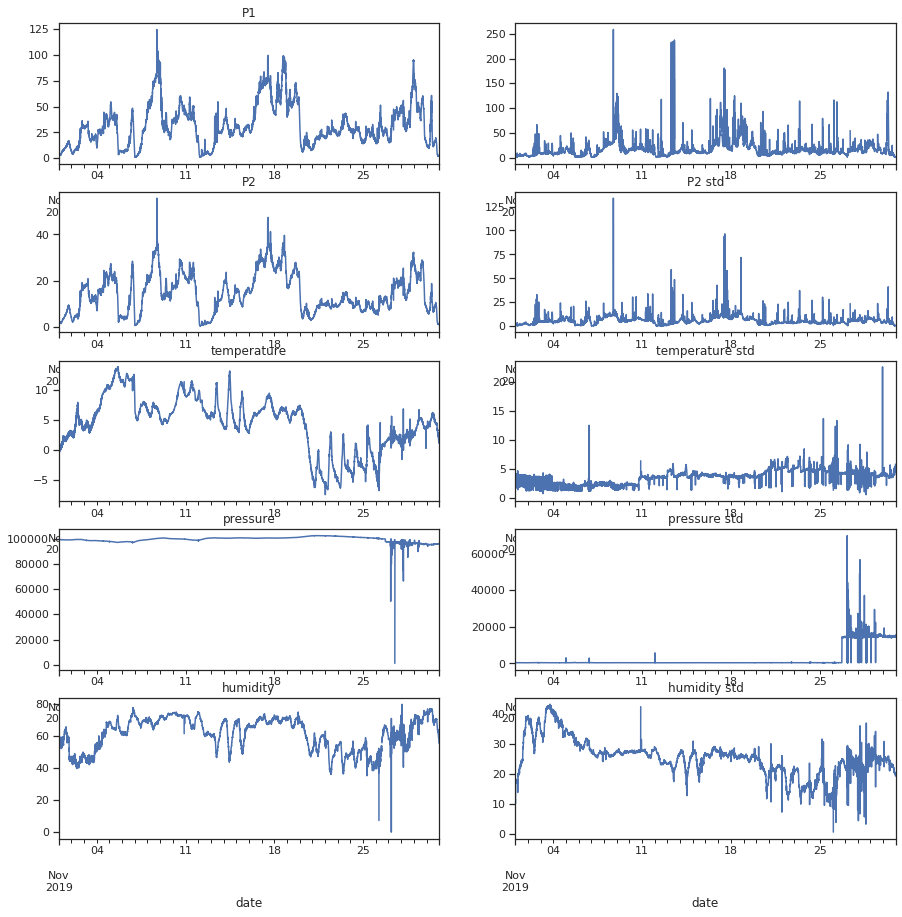

In [19]:
f, axs = plt.subplots(5,2,figsize=(15,15))
avg_data_nov.P1.plot(ax=axs[0, 0])
avg_data_nov.P2.plot(ax=axs[1, 0])
avg_data_nov.temperature.plot(ax=axs[2, 0])
avg_data_nov.pressure.plot(ax=axs[3, 0])
avg_data_nov.humidity.plot(ax=axs[4, 0])
avg_data_nov.P1_std.plot(ax=axs[0, 1])
avg_data_nov.P2_std.plot(ax=axs[1, 1])
avg_data_nov.temperature_std.plot(ax=axs[2, 1])
avg_data_nov.pressure_std.plot(ax=axs[3, 1])
avg_data_nov.humidity_std.plot(ax=axs[4, 1])
axs[0, 0].set_title('P1')
axs[1, 0].set_title('P2')
axs[2, 0].set_title('temperature')
axs[3, 0].set_title('pressure')
axs[4, 0].set_title('humidity')
axs[1, 1].set_title('P1 std')
axs[1, 1].set_title('P2 std')
axs[2, 1].set_title('temperature std')
axs[3, 1].set_title('pressure std')
axs[4, 1].set_title('humidity std')

/home/anatoly/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/anatoly/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


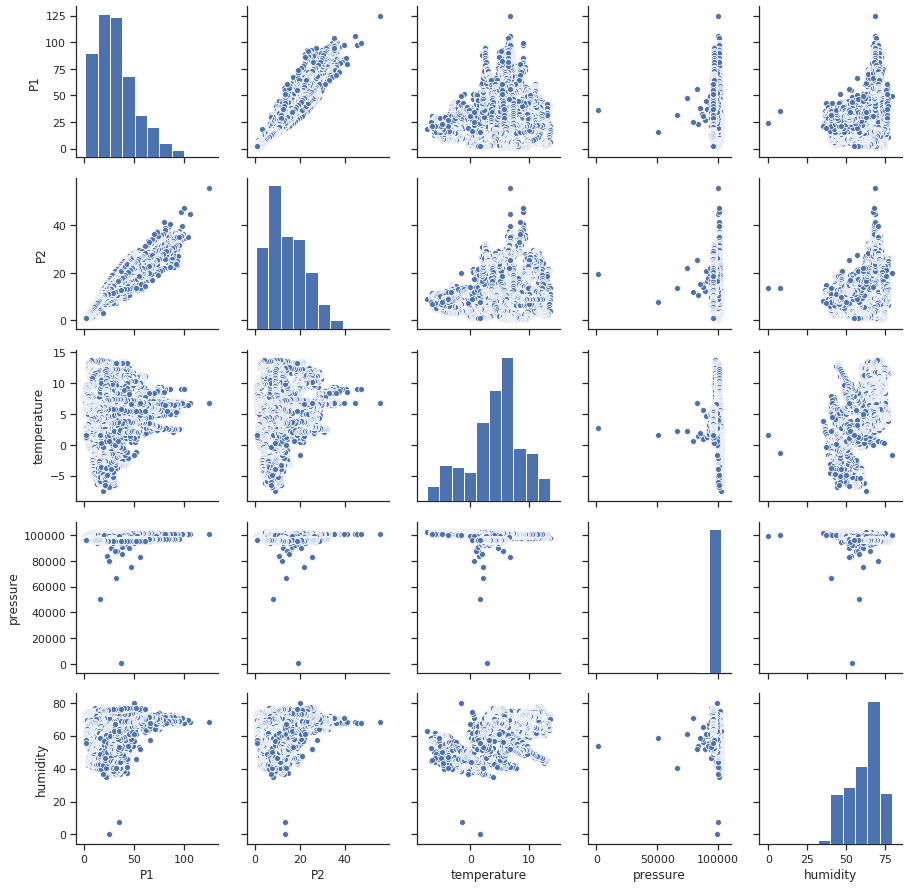

In [20]:
g = sns.pairplot(avg_data[['P1', 'P2', 'temperature', 'pressure', 'humidity']].loc['2019-11'])